In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
columns=["label", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]
cars=pd.read_table("27-auto-mpg.data",delim_whitespace=True,names=columns)
cars.head()

,label,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


数据的简单可视化

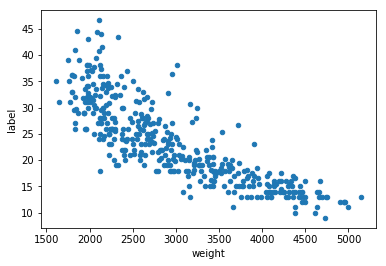

In [8]:
#先简单观察两个变量的关系
cars.plot("weight","label",kind="scatter")

## 27.1 线性回归

### step1：训练模型

In [10]:
import sklearn
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(cars[["weight"]],cars["label"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### step2：模型预测

In [12]:
predictions=lr.predict(cars[["weight"]])
print(predictions[0:5])
print(cars["label"][0:5])

[ 19.41852276  17.96764345  19.94053224  19.96356207  19.84073631]
0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: label, dtype: float64


绘图：两类点（真实值与预测值）

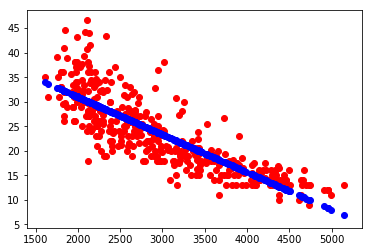

In [17]:
plt.scatter(cars["weight"],cars["label"],c="red")
plt.scatter(cars["weight"],predictions,c="blue")

### 模型评估（均方误差，用sklearn.metrics.mean_squared_error）

In [20]:
from sklearn.metrics import mean_squared_error
#均方误差
mse=mean_squared_error(cars["label"],predictions)
print(mse)
#均方根误差
rmse=mse**(0.5)
print(rmse)

18.7809397346
4.33369815915


## 27.2 LR改进模型效果

In [34]:
df=pd.read_csv("admissions.csv")
df.head()

,admit,gpa,gre
0,0,3.177277,594.102992
1,0,3.412655,631.528607
2,0,2.728097,553.714399
3,0,3.093559,551.089985
4,0,3.141923,537.184894


训练模型

In [28]:
from sklearn.linear_model import LogisticRegression
lr1=LogisticRegression()
lr1.fit(df[["gpa"]],df["admit"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

模型预测（predict_proba方法）

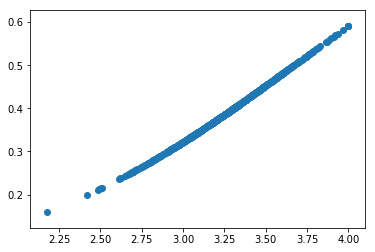

In [37]:
pred_pro=lr1.predict_proba(df[["gpa"]])
plt.scatter(df["gpa"],pred_pro[:,1])

注意：用predict_proba预测、结果有两列值

In [38]:
print(pred_pro)

[[ 0.63387918  0.36612082]
 [ 0.57129471  0.42870529]
 [ 0.74047131  0.25952869]
 ..., 
 [ 0.64994531  0.35005469]
 [ 0.53382227  0.46617773]
 [ 0.53831911  0.46168089]]


模型预测（predict方法，只得到分类值）

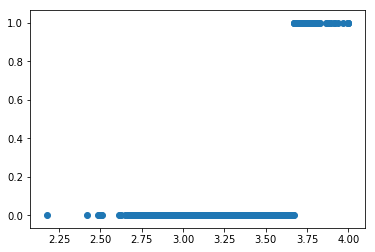

In [39]:
pred=lr1.predict(df[["gpa"]])
plt.scatter(df["gpa"],pred)

## 27.3 模型评判

标准：  
* 准确率（精度） 
* TPR（true positive rate）=TR/(TP+FN)
* TNR（true negative rate）=TN/(FP+TN)

In [40]:
df["pred_label"]=pred
df.head()

,admit,gpa,gre,pred_label
0,0,3.177277,594.102992,0
1,0,3.412655,631.528607,0
2,0,2.728097,553.714399,0
3,0,3.093559,551.089985,0
4,0,3.141923,537.184894,0


实际类别统计

In [41]:
df["admit"].value_counts()

0    400
1    244
Name: admit, dtype: int64

预测类别统计

In [43]:
df["pred_label"].value_counts()

0    598
1     46
Name: pred_label, dtype: int64

精度值计算

In [45]:
match=df["admit"]==df["pred_label"]
correct=df[match]
accuracy=len(correct)/len(df)
print(accuracy)

0.6459627329192547


TPR计算

In [51]:
TP=(df["admit"]==1)&(df["pred_label"]==1)
TP=len(df[TP])
print(TP)
FN=(df["admit"]==1)&(df["pred_label"]==0)
FN=len(df[FN])
print(FN)
TPR=TP/(TP+FN)
print(TPR)

31
213
0.12704918032786885


TNR计算

In [52]:
TN=(df["admit"]==0)&(df["pred_label"]==0)
TN=len(df[TN])
print(TN)
FP=(df["admit"]==0)&(df["pred_label"]==1)
FP=len(df[FP])
print(FP)
TNR=TN/(TN+FP)
print(TNR)

385
15
0.9625


## 27.4 ROC指标（metrics.roc_curve）

画ROC曲线

[2 1 0]


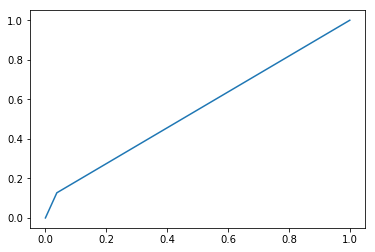

In [57]:
from sklearn import metrics

false_positive_rate,true_positive_rate,thresholds =metrics.roc_curve(df["admit"],df["pred_label"])
print(thresholds)
plt.plot(false_positive_rate,true_positive_rate)

计算AUC值（即ROC面积）（sklearn.metrics.roc_auc_score）

In [58]:
from sklearn.metrics import roc_auc_score

auc_score=roc_auc_score(df["admit"],df["pred_label"])
print(auc_score)

0.544774590164


## 27.5 交叉验证（sklearn.cross_validation）

注意：cross_val_score中df[["gpa"]]为list of list（两层[]）

In [68]:
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score

lr=LogisticRegression()
kf=KFold(len(df),5,shuffle=True)
print("每次交叉验证的准确率为：")
accuracies=cross_val_score(lr,df[["gpa"]],df["admit"],scoring="accuracy",cv=kf)
print(accuracies)
print(type(accuracies))
accuracy=accuracies.mean()
print("平均准确率为：")
print(accuracy)

每次交叉验证的准确率为：
[ 0.66666667  0.58139535  0.71317829  0.64341085  0.609375  ]
<class 'numpy.ndarray'>
平均准确率为：
0.642805232558


## 27.6 多分类问题

### 方法：one vs all(两两二分类)

In [84]:
columns=["label", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]
cars=pd.read_table("27-auto-mpg.data",delim_whitespace=True,names=columns)
cars.head()

,label,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


### get_dummies新增虚拟变量(将某列拆分成多列)

In [85]:
dummy_cylinders = pd.get_dummies(cars["cylinders"], prefix="cyl")
print(dummy_cylinders[0:5])

   cyl_3  cyl_4  cyl_5  cyl_6  cyl_8
0      0      0      0      0      1
1      0      0      0      0      1
2      0      0      0      0      1
3      0      0      0      0      1
4      0      0      0      0      1


### concat将新增列与原数据拼接

In [86]:
cars = pd.concat([cars, dummy_cylinders], axis=1)
print(cars.head())

   label  cylinders  displacement horsepower  weight  acceleration  \
0   18.0          8         307.0      130.0  3504.0          12.0   
1   15.0          8         350.0      165.0  3693.0          11.5   
2   18.0          8         318.0      150.0  3436.0          11.0   
3   16.0          8         304.0      150.0  3433.0          12.0   
4   17.0          8         302.0      140.0  3449.0          10.5   

   model year  origin                   car name  cyl_3  cyl_4  cyl_5  cyl_6  \
0          70       1  chevrolet chevelle malibu      0      0      0      0   
1          70       1          buick skylark 320      0      0      0      0   
2          70       1         plymouth satellite      0      0      0      0   
3          70       1              amc rebel sst      0      0      0      0   
4          70       1                ford torino      0      0      0      0   

   cyl_8  
0      1  
1      1  
2      1  
3      1  
4      1  


### np.random.permutation将数据打乱（注意permutation与shuffle的区别）

In [76]:
import numpy as np
shuffled_rows = np.random.permutation(cars.index)
shuffled_cars = cars.iloc[shuffled_rows]

### 将数据7:3分为训练集与测试集

In [87]:
highest_train_row = int(cars.shape[0] * .70)
train = shuffled_cars.iloc[0:highest_train_row]
test = shuffled_cars.iloc[highest_train_row:]

In [80]:
from sklearn.linear_model import LogisticRegression

unique_origins = cars["origin"].unique()
print(unique_origins)
unique_origins.sort()

[1 3 2]


### 以某些列作为特征训练

### origin列有3个值，可作三分类

最终循环,models有三个模型

In [88]:
models = {}
features = [c for c in train.columns if c.startswith("cyl")]

for origin in unique_origins:
    model = LogisticRegression()
    
    X_train = train[features]
    y_train = train["origin"] == origin

    model.fit(X_train, y_train)
    models[origin] = model

### predict_proba方法计算在origin各个类别的概率值，并打印

In [98]:
testing_probs = pd.DataFrame(columns=unique_origins)  
print(testing_probs)
print("——"*15)
for origin in unique_origins:
    # Select testing features.
    X_test = test[features]   
    # Compute probability of observation being in the origin.
    testing_probs[origin] = models[origin].predict_proba(X_test)[:,1]
print(testing_probs)

Empty DataFrame
Columns: [1, 2, 3]
Index: []
——————————————————————————————
            1         2         3
0    0.899696  0.056833  0.043402
1    0.358184  0.315464  0.323687
2    0.899696  0.056833  0.043402
3    0.899696  0.056833  0.043402
4    0.358184  0.315464  0.323687
5    0.358184  0.315464  0.323687
6    0.358184  0.315464  0.323687
7    0.899696  0.056833  0.043402
8    0.358184  0.315464  0.323687
9    0.358184  0.315464  0.323687
10   0.358184  0.315464  0.323687
11   0.358184  0.315464  0.323687
12   0.899696  0.056833  0.043402
13   0.358184  0.315464  0.323687
14   0.899696  0.056833  0.043402
15   0.983201  0.010562  0.009138
16   0.983201  0.010562  0.009138
17   0.899696  0.056833  0.043402
18   0.358184  0.315464  0.323687
19   0.358184  0.315464  0.323687
20   0.358184  0.315464  0.323687
21   0.358184  0.315464  0.323687
22   0.358184  0.315464  0.323687
23   0.358184  0.315464  0.323687
24   0.358184  0.315464  0.323687
25   0.899696  0.056833  0.043402
26   0